Topic Modelling

In [4]:
import spacy
import re
import spacy_transformers
import spacy_cleaner
from spacy_cleaner.processing import removers, replacers, mutators
import torch

import json

import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

import numpy as np
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
nlp = spacy.load('de_dep_news_trf')

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

/home/somber/anaconda3/lib/python3.9/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'de_dep_news_trf' (3.3.0) was trained with spaCy v3.3 and may not be 100% compatible with the current version (3.4.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
[nltk_data] Downloading package stopwords to /home/somber/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
pipeline = spacy_cleaner.Pipeline(
    nlp,
    removers.remove_stopword_token,
    replacers.replace_punctuation_token,
    mutators.mutate_lemma_token,
)

In [6]:
with open('BundestagsReden.json') as json_file:
    data = json.load(json_file)

Lowercase is already done during forming dictionary

In [70]:
print(data['ID20100600'][1])

sehr geehrter herr alterspräsident dr. schäuble! also, herr brandner, gleich in der ersten sitzung die braune widerlichkeitsskala in solche höhen zu treiben,das ist immerhin respektvoll.dass ausgerechnet sie willy brandt zitieren, der gegen die nazis gekämpft hat, der niedergekniet ist vor den opfern des aufstandes im warschauer ghetto, dass ausgerechnet sie, die in der tradition der nazis stehen,das hier anbringen, ist abartig, um das in aller klarheit zu sagen. abartig und ekelerregend!liebe kolleginnen und kollegen, sehr geehrte damen und herren von der afd,wenn ich mir die politische lage angucke, dann finde ich zurzeit besonders wichtig: wie entwickelt sich corona? ich finde es wichtig, darüber zu diskutieren, wie wir kinderarmut bekämpfen können. und ich mache mir große sorgen, dass sich hier eine koalition anbahnt, in der das soziale hinten runterfallen wird, weil die stabil marktradikale fdp dafür schon sorgen wird.das ist etwas, was mich und viele menschen bewegt.was ist der a

In [15]:
doc = nlp(data['ID20100600'][1].replace('–', ''))

In [16]:
# doc = nlp(data)

Tokenize

In [29]:
for token in doc:
    if (not token.is_punct 
    and not token.is_currency
    and not token.is_digit
    and not token.is_space
    and not token.is_stop
    and not token.like_num):
        print(token.lemma_)

geehrt
Herr
Alterspräsident
dr
Schäuble
Herr
Brandner
Sitzung
braun
Widerlichkeitsskala
Höhe
treiben
immerhin
respektvoll.dass
ausgerechnet
Willy
Brandt
zitieren
Nazi
kämpfen
niederknieen
Opfer
Aufstand
Warschauer
Ghetto
ausgerechnet
Tradition
Nazi
stehen
anbringen
abartig
Klarheit
sagen
abartig
ekelerregend
lieb
Kollegin
Kollege
geehrt
Dame
Herren
afd
politisch
Lage
angucken
finden
zurzeit
wichtig
entwickeln
Corona
finden
wichtig
diskutieren
Kinderarmut
bekämpfen
machen
Sorge
Koalition
anbahnen
sozial
hinten
runterfallen
stabil
marktradikal
FDP
sorgen
wird.das
Mensch
bewegt.was
afd
wichtig
afd
wichtig
Verunglimpfung
geschlechtergerecht
Sprache
einzig
sinnvoll
Änderungsantrag
sehen
parlamentarisch
verblödet
eigentlich
mal
sagen
Änderungsantrag
einzig
erkennen
offenbar
Bundestag
Gesetzestext
lesen
binnen-i
doppelpunkte
gendersternchen.das
absurd
beantragen
Gesetzestext
völlig
Papierkorb
vorlegen
Fraktion
Vorlage
sozialdemokratisch
Fraktion
unterstützen
halten
Geschäftsordnung
Grundlage


In [30]:
for token in doc:
    print(token.lemma_)

sehr
geehrt
Herr
Alterspräsident
dr
.
Schäuble
--
also
--
Herr
Brandner
--
gleich
in
der
erster
Sitzung
der
braun
Widerlichkeitsskala
in
solcher
Höhe
zu
treiben
--
der
sein
immerhin
respektvoll.dass
ausgerechnet
sie
Willy
Brandt
zitieren
--
der
gegen
der
Nazi
kämpfen
haben
--
der
niederknieen
sein
vor
der
Opfer
der
Aufstand
in
Warschauer
Ghetto
--
dass
ausgerechnet
sie
--
der
in
der
Tradition
der
Nazi
stehen
--
der
hier
anbringen
--
sein
abartig
--
um
der
in
aller
Klarheit
zu
sagen
--
abartig
und
ekelerregend
--
lieb
Kollegin
und
Kollege
--
sehr
geehrt
Dame
und
Herren
von
der
afd
--
wenn
ich
sich
der
politisch
Lage
angucken
--
dann
finden
ich
zurzeit
besonders
wichtig
--
wie
entwickeln
sich
Corona
--
ich
finden
es
wichtig
--
darüber
zu
diskutieren
--
wie
wir
Kinderarmut
bekämpfen
können
--
und
ich
machen
mir
groß
Sorge
--
dass
sich
hier
ein
Koalition
anbahnen
--
in
der
der
sozial
hinten
runterfallen
werden
--
weil
der
stabil
marktradikal
FDP
dafür
schon
sorgen
wird.das
sein
etwas
--
we

def preprocessing (textToProcess):
    #tokenize
    #remove special characters
    #remove stopwords
    #lemmata
    processedText = pipeline.clean(textToProcess)
    return processedText

In [72]:
#iterate over all texts
alltexts = []
tokenized_corpus = []
for key in data:
    #alltexts += data[key][1]
    nowhitespacetext = re.sub('\s+',' ',data[key][1])
    alltexts.append(nowhitespacetext.replace(".", " ").replace(",", " ").replace(r" *", " ").replace("  ", " ").replace("– ",""))
    #print(data[key][1])
    #doc = nlp(data[key][1].replace('–', ''))
    #processedText = preprocessing(data[key][1].replace('–', ''))
    #print(preprocessing(data[key][1].replace('–', '')))
    #print(processedText)

In [73]:
print(alltexts[0])

sehr geehrter herr alterspräsident! so muss ich es jetzt sagen genau; ich muss mich daran gewöhnen nicht lange nicht lange; da haben sie schon recht liebe kolleginnen und kollegen! meine sehr geehrten damen und herren! die übernahme der geschäftsordnung ist eine der ersten wichtigen entscheidungen die wir heute zu beginn der wahlperiode treffen müssen die geschäftsordnung ist grundlage für unsere gemeinsame arbeit sie hat sich über viele wahlperioden bewährt und wird uns auch durch die neue wahlperiode tragen es ist gute tradition dass wir die geschäftsordnung am anfang einer wahlperiode mit breiter parlamentarischer mehrheit übernehmen und das sollten wir auch heute tun sie ist nicht in stein gemeißelt das wissen diejenigen die bereits in der letzten wahlperiode hier im bundestag tätig waren sondern die geschäftsordnung ist immer ein ich sage mal lebendiges dokument das sich den gegebenheiten des parlamentarismus aber auch den gegebenheiten der arbeit hier im deutschen bundestag anpas

In [77]:
for i, text in enumerate(alltexts):
    if text.find("me cfs") != -1:
        print("gefunden")
    if text.find("me/cfs") != -1:
        print("gefunden2")
    if text.find("me-cfs") != -1:
        print("gefunden3")
    if text.find(" me ") != -1:
        print("gefunden4", text)

gefunden2
gefunden2
gefunden2
gefunden4 sehr geehrte frau präsidentin! sehr geehrte damen und herren! lieber kollege stefinger ich bin erstaunt wie wenig sie diesem parlament zutrauen wir haben den haushalt noch gar nicht verabschiedet wir sitzen hier damit wir alle gemeinsam für die guten dinge und die guten ziele kämpfen und das werden wir im november entscheiden „let me learn!“ „lass mich lernen!“ das forderten weltweit jugendvertreter/‑innen und jugendbotschafter/-innen am wochenende stellvertretend für ihre generation beim bildungsgipfel der vereinten nationen in new york bildung ist ein menschenrecht in der realität ist sie jedoch ein privileg wir lassen viele kinder und jugendliche dieser welt nicht lernen; dieses in den sdgs und in der kinderrechtskonvention verankerte recht bleibt ihnen verwehrt bereits vor der coronapandemie hatten wir es mit einer bildungskrise zu tun; denn rund die hälfte der zehnjährigen kinder war nicht in der lage eine einfache geschichte zu lesen und si

In [79]:
extra_stops = ["tja","bereich", "wichtig", "herr", "frau", "kollegin", "kollege", "dame", "mal", "geehrte", "geehrt", "nächster", "redner", "lieb", "lieber", "liebe", "fraktionskollegin", "fraktionskollege", "lm", "sagen", "antrag", "letzter", "frage", "präsidentin", "wort"] 

In [95]:
# Laufzeit: ~1:45 Stunden
# 2. Laufzeit: 4 Stunden???
stop_words = set (stopwords.words("german"))
tokenized_corpus = []
for texts in alltexts:
    doc = nlp(texts)
    tokenized_texts = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.like_num and token.lemma_.lower() not in stop_words and token.lemma_.lower() not in extra_stops and token.pos_ == "NOUN":
            tokenized_texts.append(token.lemma_.lower())
    
    tokenized_corpus.append(tokenized_texts)

In [115]:
#print(tokenized_corpus)

In [96]:
words_id = corpora.Dictionary(tokenized_corpus)
corpus = [words_id.doc2bow(txt) for txt in tokenized_corpus]

In [111]:
k_init = 10
k_final = 25

In [112]:
for k in range(k_init,k_final+1):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=words_id, num_topics = k, random_state=50, passes=40, per_word_topics=True)

    per_lda = lda_model.log_perplexity(corpus)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_corpus, dictionary=words_id, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(k,per_lda,coherence_lda)

10 -9.023489059464659 0.49145697587328285
11 -9.220521102189455 0.5133971455145185
12 -9.419564411720163 0.49422386042861804
13 -9.586863627744888 0.5410719444473128
14 -9.7262448375729 0.5299777401062108
15 -9.849687334543313 0.5150894692902438
16 -9.962788641251775 0.543503398109923
17 -10.060591327919173 0.5261078631244478
18 -10.166932863055017 0.5601675461794763
19 -10.28035089478596 0.5221244363036371
20 -10.39339150370246 0.5333466953919006
21 -10.500746918691707 0.5128770267704991
22 -10.599713569412463 0.5433951936591307
23 -10.703950540932944 0.5490276796328728
24 -10.827547899650893 0.523066335326212
25 -10.923928540204747 0.5187488399672823


In [113]:
#Laufzeit: ~2 min
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=words_id, num_topics = 23, random_state=50, passes=40, per_word_topics=True)

In [114]:
lda_model.show_topics(num_words=20, num_topics=23)

[(0,
  '0.070*"kommune" + 0.055*"wohnung" + 0.025*"mieter" + 0.024*"wohnraum" + 0.019*"vorkaufsrecht" + 0.019*"stadt" + 0.018*"wohnen" + 0.017*"wohnungsbau" + 0.017*"mieterinnen" + 0.016*"städte" + 0.013*"bauen" + 0.011*"miete" + 0.011*"gemeinde" + 0.010*"sanierung" + 0.010*"eigentum" + 0.009*"ort" + 0.008*"wohnungsmarkt" + 0.007*"bauministerium" + 0.007*"sozialwohnung" + 0.007*"ministerin"'),
 (1,
  '0.010*"mindeststandard" + 0.008*"sympathie" + 0.004*"absurdität" + 0.004*"industrieunternehmen" + 0.003*"ernährungsarmut" + 0.003*"pate" + 0.003*"klimaaktivistinnen" + 0.003*"un-resolution" + 0.002*"genugtuung" + 0.002*"rundfunkbeitrag" + 0.002*"vorjahreszeitraum" + 0.002*"nutri-score" + 0.002*"besage" + 0.002*"‑soldaten" + 0.002*"politisierung" + 0.002*"rohstoffsicherung" + 0.002*"vorlagen" + 0.001*"faktum" + 0.001*"verfassungsrichter" + 0.001*"unterernährung"'),
 (2,
  '0.021*"mensch" + 0.019*"land" + 0.012*"bundesregierung" + 0.012*"krieg" + 0.011*"welt" + 0.010*"staat" + 0.010*"demokr

In [133]:
#lda_model.save('lda_model')
#lda_model.load()

from gensim.test.utils import datapath

temp_file = datapath("model_clara")
lda_model.save(temp_file)

In [138]:
lda_model[corpus[5500]]
# Corpus[2] im Datensatz checken und Textinhalt gegen Topics prüfen

([(3, 0.012254445),
  (4, 0.10907525),
  (5, 0.029685216),
  (8, 0.072188064),
  (9, 0.05641666),
  (10, 0.4383628),
  (13, 0.07657631),
  (15, 0.030209275),
  (17, 0.118098326),
  (20, 0.05090519)],
 [(7, [4, 13, 8, 20, 17, 9, 15]),
  (11, [4, 10, 13, 8, 15, 9, 17]),
  (17, [10, 17, 4, 20, 15]),
  (22, [10, 4, 17, 9, 20, 15]),
  (44, [4, 10, 9, 15, 17, 8]),
  (52, [4, 10, 9, 15, 13]),
  (60, [10, 17, 9, 20, 15, 8, 4, 13]),
  (75, [10, 4, 8, 9, 13, 15]),
  (179, [20, 10, 17, 13, 4, 8, 5, 15]),
  (192, [8, 10, 15]),
  (195, [4, 8]),
  (216, [13, 4, 10, 8, 9]),
  (229, [4, 17, 10, 20, 15]),
  (242, [10, 17, 20, 13, 15, 4, 9]),
  (262, [9, 15, 4, 10, 17, 20]),
  (278, [10, 9, 8, 20, 17, 4, 15]),
  (280, [10, 4, 17, 9, 13, 8, 5, 15]),
  (329, [10, 4, 20, 17, 15, 9]),
  (355, [10, 17, 8, 13, 4, 3, 15]),
  (373, [8]),
  (417, [10, 17, 4, 9, 8, 20, 15]),
  (487, [10, 13, 20, 15]),
  (501, [10, 17, 15, 9, 4]),
  (549, [8, 10, 17, 20, 15, 9]),
  (559, [10, 17, 8]),
  (607, [4, 17, 13, 8, 20, 10

In [146]:
print(type(lda_model[corpus[5500]][0]))
print(lda_model[corpus[5500]][0])
print(type(lda_model[corpus[5500]][0][0]))
print(lda_model[corpus[5500]][0][0])
print(type(lda_model[corpus[5500]][0][0][0]))
print(lda_model[corpus[5500]][0][0][0])

<class 'list'>
[(3, 0.012254449), (4, 0.10909914), (5, 0.029680204), (8, 0.07219275), (9, 0.056394916), (10, 0.43834963), (13, 0.076571204), (15, 0.030243453), (17, 0.11809937), (20, 0.050886404)]
<class 'tuple'>
(3, 0.012254442)
<class 'int'>
3


In [167]:
# speichert RedeIDs mit den dazugehörigen Topics
redeIdMitTopic = {}
for i, text in enumerate(data):
    redeIdMitTopic[text] = lda_model[corpus[i]][0]

# Prints list    
for i, key in enumerate(redeIdMitTopic):
    if i % 100 == 0:
        print(key, '->', redeIdMitTopic[key])
        print('')

ID20100100 -> [(3, 0.072615184), (4, 0.5303363), (8, 0.33010793), (20, 0.051033758)]

ID20301100 -> [(4, 0.1930199), (8, 0.29406238), (10, 0.10119545), (12, 0.013649416), (15, 0.032121386), (16, 0.33218682), (17, 0.014304103), (21, 0.011850549)]

ID20600300 -> [(4, 0.090441205), (10, 0.030837446), (15, 0.29288188), (16, 0.41732416), (20, 0.16283767)]

ID20704300 -> [(4, 0.22110303), (8, 0.675462), (9, 0.07232394)]

ID20908000 -> [(2, 0.07765095), (4, 0.28379324), (8, 0.15780969), (15, 0.03123339), (16, 0.44166705)]

ID201009500 -> [(2, 0.66212296), (6, 0.025582895), (10, 0.0938282), (12, 0.022219764), (13, 0.037977036), (15, 0.0528282), (16, 0.068529), (19, 0.013887936)]

ID201107500 -> [(0, 0.012180792), (2, 0.06281646), (4, 0.044647116), (10, 0.5152859), (13, 0.020710627), (16, 0.011424876), (17, 0.14387865), (18, 0.09873115), (20, 0.08480922)]

ID201204100 -> [(2, 0.50943416), (9, 0.028340563), (13, 0.28563556), (15, 0.14902356), (16, 0.018643161)]

ID201307300 -> [(2, 0.4321789), (

In [169]:
print(data['ID203309400'][1])

sehr geehrte frau präsidentin! verehrte kolleginnen und kollegen! wenn straftäter nicht im gefängnis landen, sondern in einer psychiatrischen einrichtung, dann sorgt das bei den opfern einer straftat, bei betroffenen, auch in der öffentlichkeit oft für unverständnis. aber man muss sich einfach vor augen halten, dass es im strafverfahren erst sekundär um genugtuung für das opfer und für die öffentlichkeit geht und um opferentschädigung.es geht im strafverfahren primär um wahrheitsfindung, darum, herauszufinden: wie war der wahre tathergang, also der objektive tatbestand? und was für eine innere motivlage hat den täter zur tat gebracht? der subjektive tatbestand, auch fragen der schuldfähigkeit, des urteilsvermögens und der geistigen verfassung des täters spielen da eine rolle.beim strafvollzug ist resozialisierung primär das ziel. es geht sicher auch um satisfaktion, um genugtuung für das opfer, aber eben nicht durch drakonische strafen. der täter wird immer noch als mensch gesehen. er 

In [196]:
# finding the reden with the highest topic percentage per topic
topicarray = [(0, '')] * 23
for key in redeIdMitTopic:
    for topics in redeIdMitTopic[key]:
        #print(topics[0])
        #print(topicarray)
        #print(type(float(topics[1])), type(topicarray[topics[0]]))
        if float(topics[1]) > float(topicarray[int(topics[0])][0]):
               topicarray[topics[0]] = (topics[1], key)
            
print(topicarray)

[(0.858648, 'ID207507800'), (0.24752863, 'ID202505100'), (0.98873425, 'ID20605300'), (0.6811088, 'ID204300800'), (0.93621194, 'ID208103100'), (0.68988675, 'ID201706000'), (0.9316576, 'ID201304200'), (0.56243134, 'ID203106300'), (0.98740983, 'ID201308500'), (0.94372755, 'ID203604000'), (0.95444125, 'ID207201200'), (0.3738375, 'ID204102200'), (0.7446871, 'ID206202200'), (0.9316558, 'ID202005500'), (0.5630684, 'ID201603200'), (0.95216095, 'ID207800200'), (0.9900343, 'ID202208900'), (0.94685066, 'ID207203500'), (0.8405681, 'ID205903000'), (0.7099337, 'ID201502400'), (0.9130107, 'ID205902800'), (0.32211545, 'ID20200100'), (0.5521293, 'ID201605800')]


In [203]:
# prints texts of the reden with the highest % per topic
for i, topic in enumerate(topicarray):
    print('')
    print("Topic", i)
    print(data[topic[1]][1])


Topic 0

					vielen dank, frau präsidentin. – frau ministerin, ich möchte genau dazu noch mal nachfragen. sie haben ausgeführt, dass sie da in der ressortabstimmung sind. aber wir haben ja ein ungleichgewicht zwischen stadt und ländlichem raum. in den ländlichen räumen haben wir zunehmend leerstand, und hier sollen wir die kommunen in die lage versetzen, sich eigentum anzueignen. deswegen meine frage an sie: was sehen sie denn noch für möglichkeiten, um kommunen zum beispiel in diesem bereich und bei der sanierung zu unterstützen?
				

Topic 1
frau präsidentin! meine damen und herren! sie alle kennen den berühmten dialog aus dem film „der pate“: amerigo bonaseras tochter ist von zwei jungen männern misshandelt worden. das gericht hat die täter laufen lassen. nun erscheint bonasera beim mafiapaten don corleone, um dort auf anderem wege genugtuung für geschehenes unrecht zu erwirken. – eine eindringliche künstlerische darstellung der erkenntnis, dass der rechtsstaat nicht allein aus g

In [206]:
# 15 Monate
# topic verteilung pro monat
for topic in redeIdMitTopic:
    print(topic)

ID20100100
ID20100200
ID20100300
ID20100400
ID20100500
ID20100600
ID20100700
ID20100800
ID20100900
ID20101000
ID20101100
ID20101200
ID20101300
ID20101400
ID20200100
ID20200200
ID20200300
ID20200400
ID20200500
ID20200600
ID20200700
ID20200800
ID20200900
ID20201000
ID20201100
ID20201200
ID20201300
ID20201400
ID20201500
ID20201600
ID20201700
ID20201800
ID20201900
ID20202000
ID20202100
ID20202200
ID20202300
ID20202400
ID20202500
ID20202600
ID20202700
ID20202800
ID20202900
ID20203000
ID20203100
ID20203200
ID20203300
ID20203400
ID20203500
ID20203600
ID20203700
ID20203800
ID20203900
ID20204000
ID20204100
ID20204200
ID20204300
ID20204400
ID20204500
ID20204600
ID20204700
ID20204800
ID20204900
ID20205000
ID20205100
ID20205200
ID20205300
ID20205400
ID20205500
ID20205600
ID20205700
ID20205800
ID20205900
ID20206000
ID20206100
ID20206200
ID20206300
ID20206400
ID20206500
ID20206600
ID20206700
ID20206800
ID20206900
ID20207000
ID20207100
ID20207200
ID20207300
ID20207400
ID20207500
ID20207600
ID20300100

In [310]:
def TopicSum(topicliste):
    topicsPerX = []
    i = 0
    while i < 23:
        topicsPerX.append((i, 0))
        i = i + 1
        
    for topics in topicliste:
        for topic in topics:
            #print(topic)
            #print(topic[0])
            topicsPerX[topic[0]] = (topic[0], topicsPerX[topic[0]][1] + topic[1])
    
    return topicsPerX

In [311]:
#allMonths = []
#topicsPerMonth = [(0, 0.0)] * 23
tempTopic = ''
for i, topic in enumerate(redeIdMitTopic):
    if len(topic) == 10:
        if topic[2:5] != tempTopic:
            #print(i, topic)
            tempTopic = topic[2:5]
        #if topic[2:6] == "201":     
    if len(topic) == 11:
        if topic[2:6] != tempTopic:
            #print(i, topic)
            tempTopic = topic[2:6]

In [312]:
topicliste = []
for topic in redeIdMitTopic:
    topicliste.append(redeIdMitTopic[topic]) 
    
# print(topicliste)
topicsPerSession = []
tempTopic = ''
start = 0
end = 0
session = 0
for i, topic in enumerate(redeIdMitTopic):
    if topic[2:6] != tempTopic:
        start = end
        end = i
        tempTopic = topic[2:6]
        #print(start, end)
        if end != 0:
            topicsPerSession.append((session, TopicSum(topicliste[start:end])))
        session += 1
    if len(redeIdMitTopic) == i+1:
        start = end
        end = i
        #print(start, end)
        topicsPerSession.append((session, TopicSum(topicliste[start:end])))
        session += 1
        
#print(topicsPerMonth)
for session in topicsPerSession:
    print(session)
    print('')

(1, [(0, 0.06163598783314228), (1, 0.06163598783314228), (2, 0.8228929284960032), (3, 0.1444292226806283), (4, 3.3671804536134005), (5, 0.06163598783314228), (6, 0.07727010920643806), (7, 0.5593519080430269), (8, 1.7684344314038754), (9, 0.08175568468868732), (10, 0.4874509060755372), (11, 0.06163598783314228), (12, 0.10874325968325138), (13, 3.9667507028207183), (14, 0.0901752058416605), (15, 0.06163598783314228), (16, 0.1277502328157425), (17, 0.3952622367069125), (18, 0.06163598783314228), (19, 0.06163598783314228), (20, 0.9213372264057398), (21, 0.09331409074366093), (22, 0.06163598783314228)])

(2, [(0, 0.8826897079125047), (1, 0.17513887584209442), (2, 8.814009346067905), (3, 0.413812555372715), (4, 18.378852976486087), (5, 0.5551334731280804), (6, 11.852540297433734), (7, 0.2947867689654231), (8, 7.133778247982264), (9, 6.685284228995442), (10, 4.338256626389921), (11, 0.014673750847578049), (12, 0.5953738484531641), (13, 0.20678312052041292), (14, 0.03532522451132536), (15, 3.0

In [418]:
def SumTopicsPerMonth(sessionlist):
    summedTopics = []
    i = 0
    while i < 23:
        summedTopics.append((i, 0))
        i += 1
    
    #print(topicsPerSession[0:14])
    for i, topics in enumerate(sessionlist):
        #print(topics)
        #print(topics[1])
        for topic in topics[1]:
            #print(topic)
            summedTopics[topic[0]] = (topic[0], summedTopics[topic[0]][1] + topic[1])
    
    #print(summedTopics)
    #print('')
    #print(len(sessionlist))
    
    # normalize topicsnumbers by session amount
    for topic in summedTopics:
        #print(topic[1])
        #print(summedTopics[topic[0]])
        summedTopics[topic[0]] = (topic[0], topic[1] / len(sessionlist))
        #print('')
    
    #print(summedTopics)
    #print('')
    
    return summedTopics

In [419]:
topicsPerMonth = []
i = 1
while i < 16:
    topicsPerMonth.append((i, '', 0))
    i += 1

#print(SumTopicsPerMonth(topicsPerSession[0:14]))
topicsPerMonth[0] = (1, "10.21", topicsPerSession[0][1])
topicsPerMonth[1] = (2, "11.21", SumTopicsPerMonth(topicsPerSession[1:2]))
topicsPerMonth[2] = (3, "12.21", SumTopicsPerMonth(topicsPerSession[3:8]))
topicsPerMonth[3] = (4, "01.22", SumTopicsPerMonth(topicsPerSession[9:14]))
topicsPerMonth[4] = (5, "02.22", SumTopicsPerMonth(topicsPerSession[15:18]))
topicsPerMonth[5] = (6, "03.22", SumTopicsPerMonth(topicsPerSession[19:25]))
topicsPerMonth[6] = (7, "04.22", SumTopicsPerMonth(topicsPerSession[26:31]))
topicsPerMonth[7] = (8, "05.22", SumTopicsPerMonth(topicsPerSession[32:38]))
topicsPerMonth[8] = (9, "06.22", SumTopicsPerMonth(topicsPerSession[39:44]))
topicsPerMonth[9] = (10, "07.22", SumTopicsPerMonth(topicsPerSession[45:47]))
topicsPerMonth[10] = (11, "09.22", SumTopicsPerMonth(topicsPerSession[48:57]))
topicsPerMonth[11] = (12, "10.22", SumTopicsPerMonth(topicsPerSession[58:63]))
topicsPerMonth[12] = (13, "11.22", SumTopicsPerMonth(topicsPerSession[64:71]))
topicsPerMonth[13] = (14, "12.22", SumTopicsPerMonth(topicsPerSession[72:76]))
topicsPerMonth[14] = (15, "01.23", SumTopicsPerMonth(topicsPerSession[77:82]))

'''
for month in topicsPerMonth:
    print(month)
    print('')
'''

"\nfor month in topicsPerMonth:\n    print(month)\n    print('')\n"

In [340]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(lda_model, corpus, words_id)
p

/home/somber/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/home/somber/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-14.91514254 -14.8146475  -14.54967459 ... -11.53253179 -11.36176997
  -11.23126353]
 [-14.91514254 -14.8146475  -14.54967459 ... -11.53253179 -11.36176997
  -11.23126353]
 [ -6.36854639  -6.74296118  -6.55604034 ... -11.53253179 -11.36176997
  -11.23126353]
 ...
 [-14.91514246 -14.8146475  -14.54967459 ... -11.53253179 -11.36176997
  -11.23126353]
 [-14.91514246 -14.8146475  -14.54967459 ... -11.53253179 -11.36176997
  -11.23126353]
 [-14.91514246 -14.8146475  -14.54967459 ... -11.53253179 -11.36176997
  -11.23126353]] loaded from the file /dev/shm/joblib_memmapping_folder_7899_c4510006ecce4f5280dc60755ce12238_3af63

/home/somber/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[-14.91514254 -14.8146475  -14.54967459 ... -11.53253179 -11.36176997
  -11.23126353]
 [-14.91514254 -14.8146475  -14.54967459 ... -11.53253179 -11.36176997
  -11.23126353]
 [ -6.36854639  -6.74296118  -6.55604034 ... -11.53253179 -11.36176997
  -11.23126353]
 ...
 [-14.91514246 -14.8146475  -14.54967459 ... -11.53253179 -11.36176997
  -11.23126353]
 [-14.91514246 -14.8146475  -14.54967459 ... -11.53253179 -11.36176997
  -11.23126353]
 [-14.91514246 -14.8146475  -14.54967459 ... -11.53253179 -11.36176997
  -11.23126353]] loaded from the file /dev/shm/joblib_memmapping_folder_7899_c4510006ecce4f5280dc60755ce12238_3af636d0cc1a4948b5f34edebace3cd4/7899-139827807584704-2ba47a4e36414abb8e1ae0aaf7088575.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.277881 -0.068613       1        1  15.752195
2     -0.271812 -0.064605       2        1  14.241657
15    -0.247711  0.051415       3        1  11.783458
9     -0.221967  0.076140       4        1   9.629362
10    -0.209075 -0.054960       5        1   7.600844
6     -0.200489  0.163182       6        1   6.813320
20    -0.195039  0.052663       7        1   6.398893
17    -0.180503  0.018723       8        1   5.210904
16    -0.125170  0.015356       9        1   4.631246
8     -0.129966 -0.154499      10        1   4.327783
13    -0.093150 -0.165436      11        1   3.791480
18     0.100848 -0.096752      12        1   1.499703
12     0.077438  0.124894      13        1   1.478978
19     0.095228  0.176017      14        1   1.376232
5      0.108405  0.115508      15        1   1.346785
3      0.143137 -0.135185      16        1   1.303396
0      0.173265  0.041946      17        1   1.088350
7      0.228389 -0.037795      18        1   0.484965
21     0.240034 -0.004540      19        1   0.384277
14     0.236432 -0.020495      20        1   0.379412
11     0.246773 -0.012550      21        1   0.233874
22     0.250709 -0.010198      22        1   0.154184
1      0.252105 -0.010217      23        1   0.088702, topic_info=                     Term          Freq         Total Category  logprob  \
902                  euro   9179.000000   9179.000000  Default  30.0000   
117                mensch  14161.000000  14161.000000  Default  29.0000   
1269            milliarde   4685.000000   4685.000000  Default  28.0000   
288           unternehmen   3369.000000   3369.000000  Default  27.0000   
662                  kind   2795.000000   2795.000000  Default  26.0000   
...                   ...           ...           ...      ...      ...   
24767                weiz      0.633547      1.509008  Topic23  -7.1353   
17725  klimaaktivistinnen      2.110717      5.174017  Topic23  -5.9318   
6422           genugtuung      1.575198      8.403623  Topic23  -6.2245   
15889              besage      1.375951      7.284964  Topic23  -6.3597   
24763   hungerkatastrophe      1.063437     14.323626  Topic23  -6.6174   

       loglift  
902    30.0000  
117    29.0000  
1269   28.0000  
288    27.0000  
662    26.0000  
...        ...  
24767   6.1598  
17725   6.1310  
6422    5.3534  
15889   5.3610  
24763   4.4272  

[1347 rows x 6 columns], token_table=       Topic      Freq                       Term
term                                             
5512       3  0.983122             2‑prozent-ziel
14660     22  0.906748                 80er-jahre
21367     21  0.887345              abermillionen
21510     12  0.978657                    abfälle
36         1  0.322221               abgeordneter
...      ...       ...                        ...
5545       1  0.466638                überstunden
5545       8  0.107686                überstunden
5545      20  0.394848                überstunden
7515      22  0.795610  übertragungsnetzbetreiber
17416     23  0.447032                  ‑soldaten

[2920 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 16, 10, 11, 7, 21, 18, 17, 9, 14, 19, 13, 20, 6, 4, 1, 8, 22, 15, 12, 23, 2])

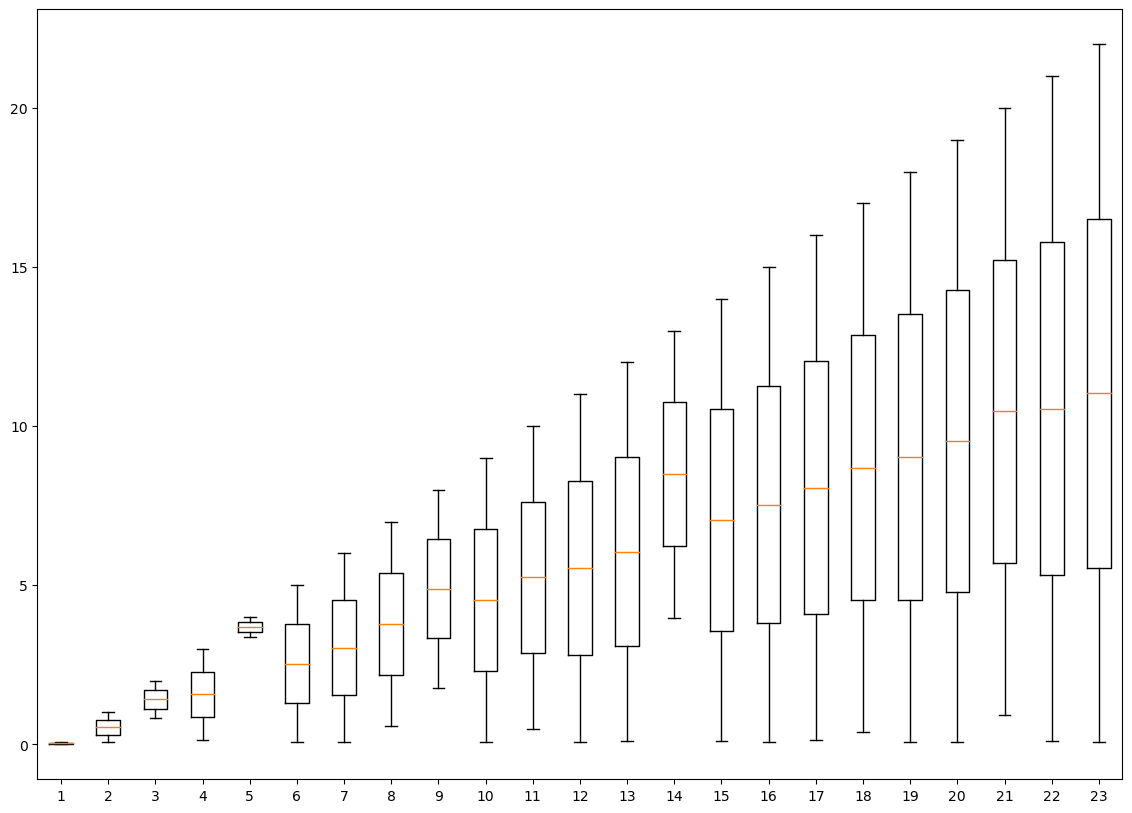

In [360]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
data = topicsPerMonth[0][2]
 
fig = plt.figure(figsize =(14, 10))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

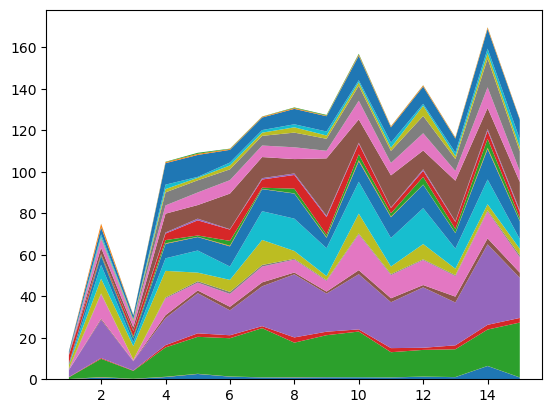

In [435]:
import numpy as np
import matplotlib.pyplot as plt

def GroupTopics (topics, topicnumber):
    groupedTopic = []
    i = 0
    while i < len(topics):
        groupedTopic.append(topics[i][2][topicnumber][1])
        i += 1
    
    return groupedTopic

# Data
x = np.arange(1, 16, 1)
topic0 = GroupTopics(topicsPerMonth, 0)
topic1 = GroupTopics(topicsPerMonth, 1)
topic2 = GroupTopics(topicsPerMonth, 2)
topic3 = GroupTopics(topicsPerMonth, 3)
topic4 = GroupTopics(topicsPerMonth, 4)
topic5 = GroupTopics(topicsPerMonth, 5)
topic6 = GroupTopics(topicsPerMonth, 6)
topic7 = GroupTopics(topicsPerMonth, 7)
topic8 = GroupTopics(topicsPerMonth, 8)
topic9 = GroupTopics(topicsPerMonth, 9)
topic10 = GroupTopics(topicsPerMonth, 10)
topic11 = GroupTopics(topicsPerMonth, 11)
topic12 = GroupTopics(topicsPerMonth, 12)
topic13 = GroupTopics(topicsPerMonth, 13)
topic14 = GroupTopics(topicsPerMonth, 14)
topic15 = GroupTopics(topicsPerMonth, 15)
topic16 = GroupTopics(topicsPerMonth, 16)
topic17 = GroupTopics(topicsPerMonth, 17)
topic18 = GroupTopics(topicsPerMonth, 18)
topic19 = GroupTopics(topicsPerMonth, 19)
topic20 = GroupTopics(topicsPerMonth, 20)
topic21 = GroupTopics(topicsPerMonth, 21)
topic22 = GroupTopics(topicsPerMonth, 22)

y = np.vstack([topic0, topic1, topic2,
              topic3, topic4, topic5,
              topic6, topic7, topic8,
              topic9, topic10, topic11,
              topic12, topic13, topic14,
              topic15, topic16, topic17,
              topic18, topic19, topic20,
              topic21, topic22])

# Stacked area plot
fig, ax = plt.subplots()

ax.stackplot(x, y)

In [421]:
print(topicsPerMonth[14][2][0][1])

0.8664475530385971
